# Introduction
Bagging stands for Bootstrap Aggregation. It is an ensemble learning technique that aims to improve the performance and stability of machine learning models. The core idea is to train multiple models on different subsets of the original data and then aggregate their predictions to arrive at the final prediction.

### How does bagging work?
1. Bootstrap sampling: Multiple subsets of the original data are created with replacement (called bootstrap samples). This means data points can be chosen more than once in a single sample.
2. Model training: Each base model is trained independently on its respective bootstrap sample.
3. Aggregation:
    - After training, the predictions from all the base models are combined using a specific technique.
    - For example, averaging is one technique which calculates the mean of the individual prediction (82%, 90%. and 78%) to get the final prediction (83.33%).
    - Other common aggregation techniques include voting (for classification) and weighted averaging.

### Benefits of bagging
- Reduced variance: By averaging predictions from different models (trained on slightly different data), bagging helps in reducing the variance of the overall model. This makes the final predictions less sensitive to random fluctuations in the training data and leads to better generalization.
- Improved accuracy: Bagging can often achieve higher accuracy compared to a single model, especially for problems with high variance.

### Random Forest
- Random Forest is a popular ensemble learning technique that follows the bagging principle.
- It uses decision trees as base models and incorporates additional randomness during training by randomly selecting features at each split node in the tree.
- Random Forests are known for their effectiveness in various machine learning tasks due to their ability to reduce variance and improve accuracy.

# What Is Random Forest?
- Random Forest is an ensemble technique that relies on a multitude of decision trees for prediction.
- To improve the overall performance, the tree within the forest need to be different from each other. This prevents the ensemble from overfitting to the training data.

### Random sampling for diversity
- Row sampling (RS): During tree creation, a random subset of data points (rows) is selected from the original dataset with replacement. This means that a single data point can be chosen multiple times for a single tree.
- Column sampling (CS): At each node in a tree, a random subset of features (columns) is selected from the full set of features. The tree then splits the data based on the best split among these chosen features. This injects randomness into the tree structure.

### Building the Random Forest
The core components of a Random Forest are, DTs + RS + CS + Aggregation. The following is what each one of them mean,
- DTs: The Decision Trees that make up the forest.
- RS: Row sampling for training data selection.
- CS: Column sampling for feature selection at each node.
- Aggregation: Combining predictions from all trees (usually majority vote for classification, and averaging for regression).

### Hyperparameters in Random Forest
- `n_estimators`: This hyperparameter controls the number of trees to be created in the forest. More trees generally lead to better performance but also increase the training time.
- `max_features`: This parameter specifies the number of features randomly chosen at each node for splitting. A lower value introduces more randomness and helps prevent overfitting.

### What does "Random" in Random Forest refer to?
- The "Random" in Random Forest refers to the random sampling of rows and columns during tree creation, leading to diverse trees.
- "Forest" signifies the collection of multiple Decision Trees.

### Example
- With 10 features, a 20% random column sample (2 feature) and a 40% random row sample (400 rows from 1000) would be used to train 1 Tree.
- This process is repeated for the specified number of estimators (e.g., 100 trees).

### Aggregation and underfitting
- Random Forests typically use majority voting for classification (the most frequent class predicted by the Trees wins). Averaging is used for regression.
- Individual Trees in a Random Forest might be underfit due to limited data and random features at each split. However, the ensemble combines these weaker learners to create a more robust model.

# Random Forest Algorithm
Random Forest is a powerful ensemble learning technique widely used for classification and regression tasks. It leverages the strengths of multiple Decision Trees to create a robust and accurate model.

### Core idea
- Random Forests build a collection of Decision Trees, each trained on a random subset of the data. This creates diversity among the trees, preventing them from overfitting to the training data.
- When making a prediction, the forest combines the predictions from all the individual trees using a voting mechanism for classification or averaging for regression. This reduces the variance of the model and improves its generalization ability.

### Key components
1. Decision Trees: These are the building blocks of the Forest. Each Tree learns a set of rules for classifying or predicting based on the features in the data.
2. Random sampling:
    - Row sampling (Bootstrap aggregation): During Tree creation, a random subset of data points (rows) are selected with replacement from the original dataset. This means a data point can be included in a tree multiple times.
    - Column sampling (Feature subsetting): At each node in a Tree, a random subset of features (columns) are chosen from the full set. The Tree then splits the data based ob the best split among these chosen features. This injects randomness into the Tree structure.
3. Aggregation: This refers to how th predictions from all the Trees are combined to make a final prediction.
    - Classification: Majority voting is typically used. The class predicted by most Trees becomes the final prediction.
    - Regression: Averaging the predicted values from all Trees in common.

### Building the Random Forest
1. Define the parameters: Specify the number of Trees (`n_estimators`) to create and the number of features (`max_features`) to randomly choose at each node for splitting.
2. Create Trees:
    - Draw a bootstrap sample of data points.
    - Build a Decision Tree using the sampled data and chosen features (`max_features`) at each node.
    - Repeat the above 2 steps for the specified number of Trees (`n_estimators`).
3. Prediction:
    - For a new data point, make predictions using each Tree in the forest.
    - Combine the individual predictions using the chosen aggregation method (voting or averaging).

### Advantages of Random Forests
- Improved accuracy and generalizability: By combining multiple diverse Trees, Random Forests often achieves higher accuracy than a single Decision Tree and are less prone to overfitting.
- Handles missing data well: Decision Trees can naturally handle missing data by splitting on existing features.
- Robust to outliers: Ensemble methods like Random Forests are less sensitive to outliers in the data compared to single models.
- Provides feature importance: Random Forests can be used to understand the relative importance of features in the model.

### Disadvantages of Random Forests
- Can be a black box: The inner workings of individual Trees and how they contribute to the final prediction can be difficult to interpret.
- Computationally expensive: Training a Random Forest with many Trees can be computationally expensive compared to simpler models.

# Out-Of-Bag (OOB) Score
### Core idea
- Random Forests use bootstrap aggregation (bagging) to train Decision Trees. Each Tree is trained on a random subset (m rows) of the original data (n rows).
- The remaining data points (n - m rows) that are not used to train a paticular Tree are called Out-Of-Bag (OOB) samples for that Tree.

### OOB for evaluation
Individual Tree evaluation: OOB samples can be used to evaluate the performance of each Tree in the Forest.
- The trained Tree predicts the class/ value for each OOB sample.
- These predictions are compared with the actual values to calculate the error (e.g., difference for classification, squared difference for regression).

### Overall OOB score
- Average error: The OOB score is the average of the errors calculated for all OOB samples across all Trees in the Forest.
- Cross-validation alternative: This provides an estimate of the model's generalization performance without needing a separate cross-validation process.

### Benefits of OOB score
- Efficiency: Since OOB samples are readily available during forest training, calculating the OOB score is computationally efficient.
- Reduced bias: OOB evaluation avoids bias that can occur when using a separate validation set, as each data point is left out for evaluation at least once.

### Example
- Consider a dataset with 7 data points (A-F) and 3 Trees ($m_1$, $m_2$, $m_3$).
- The OOB data for each model might be,
    - $m_1$: B, C
    - $m_2$: A, E, F
    - $m_3$: C, D
- For data point C (present in OOB for $m_1$ and $m_3$),
    - Predictions can be made using both the models ($m_1(C)$ and $m_3(C)$).
    - Average these predictions ($P(C) = \frac{m_1(C) + m_3(C)}{2}$).
    - Compare this average prediction with the actual value of $C$ ($y_{actual}(C)$) to calculate the error ($error_C = y_{actual}(C) - P(C)$).

### Overall OOB error
We repeat the above for all data points and all Trees where there are OOB samples. The OOB error is the sum of these individual errors across all data points,
    - $error_{OOB} = \sum_{i = 1}^n(error_i)$.

### OOB score v. actual score
While OOB score provides a good estimate of performance, it might not always match an explicitly calculated cross-validation score due to random sampling variations.

# Code Implementation Of Random Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")
df = pd.concat([df1, df2])
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [4]:
# missing values
df.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [5]:
# duplicated
df.duplicated().sum()

np.int64(0)

In [6]:
# dropping "Employee ID" column
df.drop(columns = ["Employee ID"], inplace = True)
df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [7]:
# label encoding the binary columns
binary_columns = [i for i in df.columns if df[i].dtype not in [int, float] and df[i].nunique() == 2]
binary_columns

['Gender',
 'Overtime',
 'Remote Work',
 'Leadership Opportunities',
 'Innovation Opportunities',
 'Attrition']

In [8]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(dataframe, column):
    labelencoder = LabelEncoder()
    dataframe[column] = labelencoder.fit_transform(dataframe[column])
    return dataframe

In [9]:
for i in binary_columns:
    df = label_encoder(df, i)

df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,1,19,Education,5390,Excellent,Medium,Average,2,0,22,Associate Degree,Married,0,Mid,Medium,89,0,0,0,Excellent,Medium,1
1,59,0,4,Media,5534,Poor,High,Low,3,0,21,Master’s Degree,Divorced,3,Mid,Medium,21,0,0,0,Fair,Low,1
2,24,0,10,Healthcare,8159,Good,High,Low,0,0,11,Bachelor’s Degree,Married,3,Mid,Medium,74,0,0,0,Poor,Low,1
3,36,0,7,Education,3989,Good,High,High,1,0,27,High School,Single,2,Mid,Small,50,1,0,0,Good,Medium,1
4,56,1,41,Education,4821,Fair,Very High,Average,0,1,71,High School,Divorced,0,Senior,Medium,68,0,0,0,Fair,Medium,1


In [10]:
# one-hot encoding the categorical columns
ohe_columns = [i for i in df.columns if 10 >= df[i].nunique() > 2]
ohe_columns

['Job Role',
 'Work-Life Balance',
 'Job Satisfaction',
 'Performance Rating',
 'Number of Promotions',
 'Education Level',
 'Marital Status',
 'Number of Dependents',
 'Job Level',
 'Company Size',
 'Company Reputation',
 'Employee Recognition']

In [11]:
def one_hot_encoder(dataframe, categorical_columns, drop_first = True):
    dataframe = pd.get_dummies(dataframe, columns = categorical_columns, drop_first=drop_first)
    return dataframe

In [12]:
df = one_hot_encoder(df, ohe_columns, drop_first=True)
df.head()

,Age,Gender,Years at Company,Monthly Income,Overtime,Distance from Home,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Attrition,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Work-Life Balance_Fair,Work-Life Balance_Good,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Medium,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_High,Performance Rating_Low,Number of Promotions_1,Number of Promotions_2,Number of Promotions_3,Number of Promotions_4,Education Level_Bachelor’s Degree,Education Level_High School,Education Level_Master’s Degree,Education Level_PhD,Marital Status_Married,Marital Status_Single,Number of Dependents_1,Number of Dependents_2,Number of Dependents_3,Number of Dependents_4,Number of Dependents_5,Number of Dependents_6,Job Level_Mid,Job Level_Senior,Company Size_Medium,Company Size_Small,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
0,31,1,19,5390,0,22,89,0,0,0,1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False
1,59,0,4,5534,0,21,21,0,0,0,1,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False
2,24,0,10,8159,0,11,74,0,0,0,1,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,True,False,False
3,36,0,7,3989,0,27,50,1,0,0,1,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False
4,56,1,41,4821,1,71,68,0,0,0,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True,False


In [13]:
# splitting the train and test dataset
from sklearn.model_selection import train_test_split

x = df.drop(columns = ["Attrition"])
y = df["Attrition"]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((59598, 49), (14900, 49), (59598,), (14900,))

In [15]:
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
# fitting a DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion = "gini")
dt_classifier.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [17]:
# training accuracy score
dt_classifier.score(x_train_scaled, y_train)

1.0

In [18]:
# testing accuracy score
dt_classifier.score(x_test_scaled, y_test)

0.666510067114094

In [19]:
# now fitting a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(criterion = "gini")
rf_classifier.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [20]:
# training accuracy score
rf_classifier.score(x_train_scaled, y_train)

1.0

In [21]:
# testing accuracy score
rf_classifier.score(x_test_scaled, y_test)

0.7500671140939598

# Reducing Training Time In Random Forest
### Challenges and considerations
- `n_estimators`: A higher number of trees (`n_estimators`) leads to better performance but also increases training time.

### Approaches for reducing training time
- Reduce the number of trees (`n_estimators`): This is the most straightforward approach, but it might affect performance. Experiment with different values to find a good balance.
- Limit sampling (with caution):
    - Row sampling: Reducing the number of rows sampled for each Tree can speed up training. However, it is important to excercise caution. Excessively reducing rows can lead to underfitting due to limited data for each tree.
    - Column sampling: Similarly, reducing the number of features (columns) considered at each split can speed up training. But again, it is important to excercise caution. Reducing features too much can limit the model's ability to learn complex relationships and lead to underfitting.
- Leverage parallel processing: Since Random Forest Trees are independent, they can be trained in parallel using techniques like multi-processing or libraries like `joblib`. This can significantly reduce training time if there is machine with multiple cores or CPUs.

### Additional tips
- Hardware optimization: Ensure sufficient RAM and processing power on the machine for faster training.
- Data preprocessing: Preprocess the data efficiently (e.g., handle missing values, encode categorical features) to avoid bottlenecks during training.
- Grid search (optional): Consider using grid search (`GridSearchCV`) to find the optimal combination of hyperparameters (e.g., `n_estimators`, `max_features`) that balance performance and training time for the specific problem.

The key is to find the sweet spot training time and model performance. Experiment with different approaches and monitor the impact on accuracy and training duration. Remember, a slightly lower number of trees might be acceptable if training time is a significant concern, as long as the model still performs well.

# Training Parallelization
### Parallelizing for faster training
- Independent Trees: The beauty of Random Forest lies in the independence of individual Decision Trees. Each Tree is trained on a different subset of data and does not rely on the results of the other trees.
- Multi-processing: This characteristic makes Random Forests ideal for parallelization using techniques like multi-processing.
- `n_jobs`: In `scikit-learn` or `sklearn`, the `n_jobs` attribute in the `RandomForestClassifier` (or `RandomForestRegressor`) controls the level of parallelization.
    - `n_jobs = 1` utilizes all avaliable CPU cores.
    - Specify a specific number, e.g., `n_jobs = 4`, to utilize that many cores.
    - Setting `n_jobs = 1` (default) disables parallelization.

### Benefits of parallelization
- Reducing training time: By training multiple Trees simultaneously on different cores, the overall training process becomes significantly faster. This allows to,
    1. Train models with a larger number of Trees (potentially improving performance) without excessive waiting.
    2. Run multiple experiments or perform hyperparameter tuning more efficiently.
- Improved efficiency: Parallelizatio leverages the processing power of the machine more effectively, leading to faster model development and iteration.

### Note
- No impact on accuracy: Parallelization itself doesn't directly improve the model's accuracy. It focuses on speeding up training, allowing to explore more training options that might lead to better models.

# Feature Importance In Random Forest
Feature importance is a crucial aspect of understanding how Random Forest models make predictions. It helps in assessing which features contribute most significantly to the model's decisions.

### Why feature importance matters?
- Model interpretability: Feature importance provides insights into the features that the model relies on for classification or regression. This helps you understand the underlying relationships between features and the target variable.
- Feature selection: Identifying the most important features can guide in selecting a relevant subset of features for further analysis or model building. This can improve model performance and reduce training time.

### Approaches to feature importance in Random Forests
There are 2 primary methods to evaluate feature importance in Random Forests,
- Mean Decrease in Impurity (MDI):
    - This is the default method used by `sklearn` Random Forest implementations.
    - It measures how much a feature contributes to reducing impurity (increasing homogeneity) within a node during Tree building.
    - For classification tasks, impurity is often measured using Gini Index or Information Gain. For regression, it might be variance reduction.
    - MDI calculates the average decrease in impurity across all Trees in the Forest for each feature split. Features with higher MDI scores are considered more important.
- Permutation feature importance:
    - This approach measures the importance of a feature by shuffling its values and observing the resulting decrease in model performance.
    - The rationale is that shuffling a feature with high importance will significantly disrupt the model's ability to learn patterns, leading to a larger performance drop compared to shuffling a less important feature.
    - Permutation importance can be calculated in 2 ways,
        - Out-Of-Bag (OOB) permutation importance: This method uses the OOB data points of each Tree for evaluation. For a data point, the feature values are shuffled, and the model's prediction on that data point is compared to the original prediction. The average difference across all OOB data points is the permutation importance for that feature.
        - Full permutation importance: This method shuffles features for all data points and refits the entire Forest to evaluate the impact on the overall performance metric (e.g., accuracy, R-Squared).

### Choosing the right approach
- MDI: This is a computationally efficient method readily available in `sklearn`. It's good starting point for understanding feature importance. However, MDI might not always accurately reflect the true importance of features, especially when features are highly correlated.
- Permutation feature importance: This method provides a more robust assessment of feature importance but can be computationally expensive, especially for large datasets.

### Additional considerations
- Feature importance scores are relative within a model. A higher score for one feature indicates its greater importance compared to other features in that particular model.
- Feature importance can vary depending on the specific dataset and problem. It's essential to interpret the results in the context of the domain knowledge.

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(criterion = "gini")
rf_classifier.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [23]:
# training accuracy score
rf_classifier.score(x_train_scaled, y_train)

1.0

In [24]:
# testing accuracy score
rf_classifier.score(x_test_scaled, y_test)

0.752751677852349

In [25]:
rf_classifier.feature_importances_

array([0.06685367, 0.01522044, 0.06749166, 0.07639659, 0.01350418,
       0.08100905, 0.07254393, 0.04623095, 0.00554233, 0.01049302,
       0.00933714, 0.01135911, 0.00952666, 0.01127209, 0.01851085,
       0.01081797, 0.0147756 , 0.00837112, 0.01133008, 0.01159251,
       0.01030421, 0.01179133, 0.00613815, 0.01262348, 0.01104422,
       0.01212866, 0.00315699, 0.01301877, 0.01117121, 0.01101714,
       0.01122799, 0.02508059, 0.06014108, 0.01234509, 0.00957489,
       0.00968469, 0.01006953, 0.00570916, 0.00189794, 0.0226341 ,
       0.0696905 , 0.01387842, 0.01237718, 0.00813201, 0.01120422,
       0.00985964, 0.01367998, 0.01290484, 0.00533503])

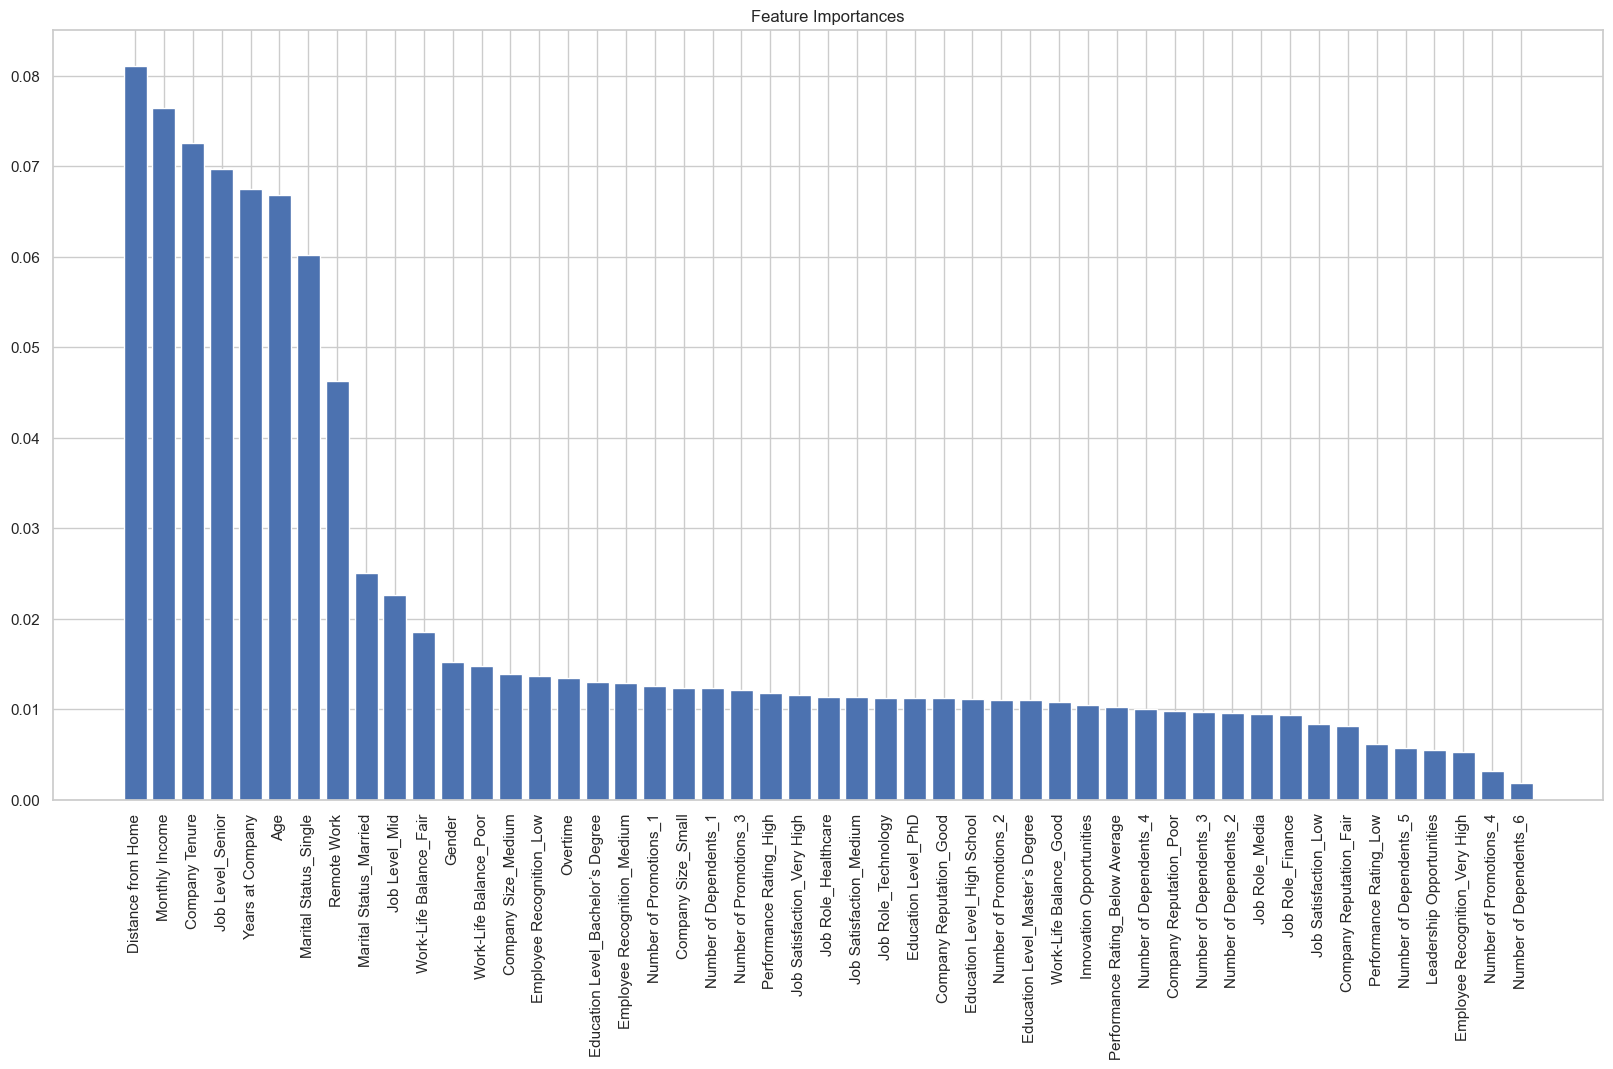

In [26]:
# feature importance
feature_importances = rf_classifier.feature_importances_

indices = np.argsort(feature_importances)[::-1]
names = [x_train.columns[i] for i in indices]

plt.figure(figsize = (20, 10))
plt.title("Feature Importances")
plt.bar(range(x_train_scaled.shape[1]), feature_importances[indices])
plt.xticks(range(x_train_scaled.shape[1]), names, rotation = 90)
plt.show()

# Hyperparameters In Random Forest
These are parameters that control the learning process of the model but are not directly learned from the data. They need to be set before training time Forest.

### Common hyperparameters
- `n_estimators`: The number of trees in the Forest. More Trees generally improve performance but increase training time.
-  `max_samples`: Row samples ratio (0 to 1). Defines the proportion of rows (data points) randomly chosen for training each Tree.
- `max_features`: Column sampling (values: `"log2"`, `"sqrt"`, `None`), Defines the number of features randomly chosen at each split in a Tree.

### Regularization in Decision Trees (CCP Alpha)
- Linear models use L1 or L2 regularization to penalize model complexity. Decision Trees do not have weights like linear models.
- CCP Alpha (Cost Complexity Pruning): This hyperparameter penalizes the model based on the number of terminal nodes (leaves). Fewer nodes generally lead to simpler, less overfitting models.
    - Higher `ccp_alpha` values lead to more pruning (fewer nodes), potentially causing underfitting.
    - Lower values allow for more complex Trees (more nodes), potentially leading to overfitting.

### Hyperparameter tuning
Finding the optimal combination of hyperparameters is crucial for good model performance. Manually trying different values can be time consuming and inefficient, especially with multiple parameters.

### `sklearn` techniques
- `GridSearchCV` This approach creates a grid of all possible combinations of hyperparameter values specified by the user. It trains a model for each combination using cross-validation to evaluate performance. Finally, it selects the combination with the best cross-validation score.
    - Advantage: Provides an exhaustive search, guaranteeing to find the best combination within the defined grid.
    - Disadvantage: Can become computationally expensive with many hyperparameters and values.
- `RandomSearchCV`: This approach randomly samples a subset of combinations from the defined grid and trains models for those. It uses cross-validation to evaluate performance and selects the best combination among those explored.
    - Advantage: More efficient that `GridSearchCV`, especially with many parameters.
    - Disadvantage: May miss the absolute best combination, but often provides a good balance between performance and efficiency.

### Additional considerations
- CV parameter: This parameter in `GridSearchCV` and `RandomSearchCV` controls the number of cross-validation folds used to evaluate models. More folds generally provide a more robust estimate of performance but increase training time.
- Advanced methods: Bayesian optimization is more sophisticated technique that iteratively explores the hyperparameter space based on past performance, potentially converging to an optimal solution faster. However, it's typically used for complex problems with many hyperparameters.

In [27]:
# hyperparameter
params = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [3, 5, 10, 20],
    "criterion": ["entropy", "gini"],
    "bootstrap": [True, False],
    "max_features": [8, 9, 10],
    "ccp_alpha": [0.1, 1, 10]
}

from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier()
grid_search_rf_classifier = GridSearchCV(
    estimator = rf_classifier,
    param_grid = params,
    scoring = "accuracy",
    cv = 3,
    n_jobs = -1
)

grid_search_rf_classifier.fit(x_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'ccp_alpha': [0.1, 1, 10],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 10, 20],
                         'max_features': [8, 9, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [28]:
grid_search_rf_classifier.best_params_

{'bootstrap': True,
 'ccp_alpha': 0.1,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 8,
 'n_estimators': 100}

In [29]:
grid_search_rf_classifier.best_score_

np.float64(0.5255881069834558)

# Bias-Variance Trade-Off In Random Forest
Decision Trees tend to have low bias and high variance.
- Low bias: Decision Trees flexible enough to capture complex relationships in data, leading to low bias.
- High variance: However, they are also prone to overfitting, especially when grown deeply. Small changes in the training data can lead to significantly different trees (hihg variance).

By combining multiple Decision Trees, Random Forests achieve a better balance beween bias and variance.

### How do Random Forests reduce variance?
- Ensemble learning: Combining predictions from multiple trees (ensemble) reduces the variance of the overall model. Individual Tree overfitting is "averaged out" by the ensemble.
- Bootstrap aggregation (Bagging): Random Forests use Bagging. Each Tree is trained on a different subset of data (bootstrap sample), leading to diversity among the Trees.
- Row sampling and column sampling: Trees do not rely on the same data points or features for splitting, preventing them from becoming too similar and overfitting the same patterns.

### Bias-variance and errors
- High bias: High bias models underfit the training data. This leads to high errors on both the training and testing sets, as the model fails to capture the underlying relationships.
- High variance: High variance models overfit the training data. They perform well on the training set with low errors but perform poorly on unseen data (testing set) with high errors. There's a large gap between training and testing performance.

### Random Forests and errors
Random Forests aim for a sweet spot with low bias (due to their flexibility) and reduced variance (due to ensemble averaging and diversity). This helps achieve lower errors on both training and testing sets, leading to better generalization.

### Non-reducible errors
There will always be some inherent error in any model due to factors like noise in the data or limitations of the model itself. There are non-reducible errors.